# Laboratorio 7

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
#matplotlib inline

ThemeRegistry.enable('opaque')

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [5]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
display(diabetes.head(2))
#display(diabetes_X.head(2))


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0


## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* por que probablemente ya fue estandarizada 
* target
* no, debido al rango de valores 

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [10]:
regr_with_incerpet = linear_model.LinearRegression(fit_intercept=True)
regr_with_incerpet.fit(diabetes_X,diabetes_y)

LinearRegression()

In [7]:
diabetes_y_pred_with_intercept = regr_with_incerpet.predict(diabetes_X)
#diabetes_y_pred_with_intercept

In [8]:
# Coeficientes
print(f"Coefficients: \n{regr_with_incerpet.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_with_incerpet.intercept_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_with_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_with_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
152.1334841628965

Mean squared error: 2859.69

Coefficient of determination: 0.52


In [11]:
regr_without_incerpet = linear_model.LinearRegression(fit_intercept=False)
regr_without_incerpet.fit(diabetes_X,diabetes_y)

LinearRegression(fit_intercept=False)

In [12]:
diabetes_y_pred_without_intercept = regr_without_incerpet.predict(diabetes_X)

In [13]:
# Coeficientes
print(f"Coefficients: \n{regr_without_incerpet.coef_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_without_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Mean squared error: 26004.29

Coefficient of determination: -3.39


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__
 en ambos casos el ajuste no es bueno pero claramente es mejor el primero pues se obtiene un error cuadratico medio mucho menor y un valor del coeficiente de determinacion mas cercano a 1.

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [15]:
for col in diabetes_X:
    X_i = np.array(diabetes_X[col]).reshape(442,1)
    regr_i = linear_model.LinearRegression(fit_intercept=True)
    regr_i.fit(X_i,diabetes_y)
    diabetes_y_pred_i = regr_i.predict(X_i)
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(diabetes_y,diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_y,diabetes_y_pred_i):.2f}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

Feature: s4
	Coefficients: 

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** bmi pues es el que tiene coeficiente de determinacion mas cercano a 1 y un menor error cuadratico medio 

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [16]:
regr = linear_model.LinearRegression(fit_intercept=True).fit(np.array(diabetes_X["bmi"]).reshape(442,1),diabetes_y)

Text(0.5, 0, 'indice de masa muscular')

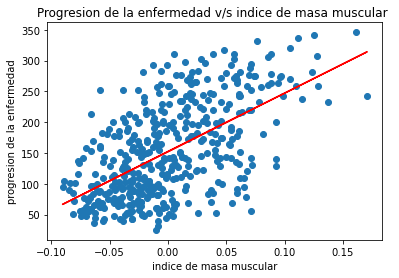

In [17]:
plt.scatter(np.array(diabetes["bmi"]).reshape(442,1),diabetes_y)
plt.plot(np.array(diabetes["bmi"]).reshape(442,1), regr.predict(np.array(diabetes["bmi"]).reshape(442,1)), color='red')
plt.title("Progresion de la enfermedad v/s indice de masa muscular ")
plt.ylabel("progresion de la enfermedad")
plt.xlabel("indice de masa muscular")